In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


1) Загрузите прилагающийся датасет.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML6.1%20clustering/data/Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


2) Проверьте датасет на наличие пустых значений. Если есть пустые значения, то заменить их на наиболее подходящие.

In [17]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Вывод: пустых значений в датасете нет

3) Постройте графическую интерпретацию значений датасета. В качестве x-координаты используйте Annual Income, в качестве y-координаты Spending Score.

<ipython-input-31-05415fcd813e>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, palette=['red', 'green'], alpha=0.6, ax=ax)


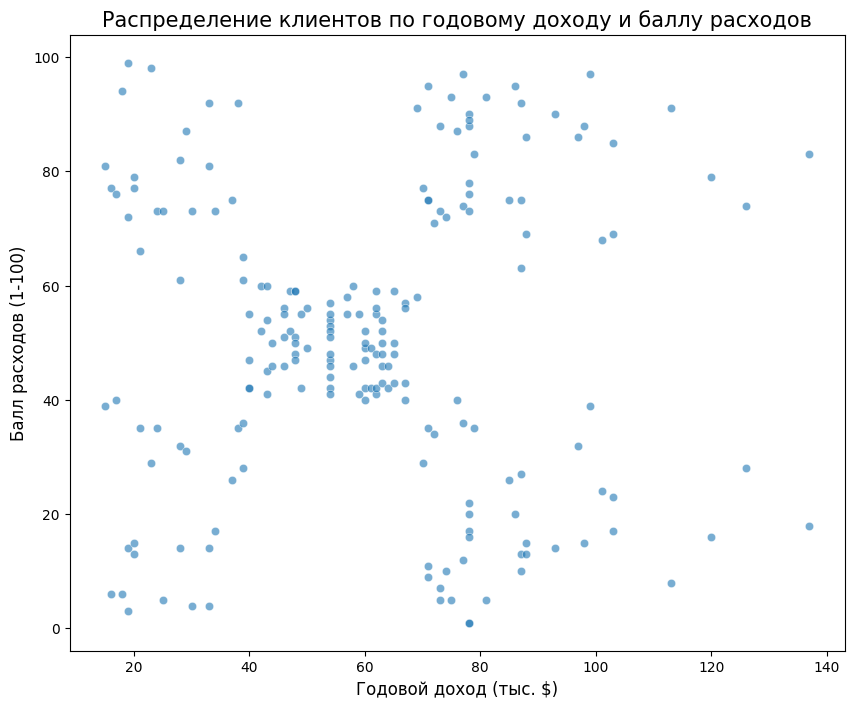

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=data, palette=['red', 'green'], alpha=0.6, ax=ax)

ax.set_title('Распределение клиентов по годовому доходу и баллу расходов', fontsize=15)
ax.set_xlabel('Годовой доход (тыс. $)', fontsize=12)
ax.set_ylabel('Балл расходов (1-100)', fontsize=12)

plt.show()

Вывод: по данному графику видно, что люди по доходам и баллам расходов хорошо делятся на 5 кластеров

4) Определите наилучшее число кластеров с помощью графической зависимости числа кластеров от суммы квадратов расстояний значений датасета до центра кластера.

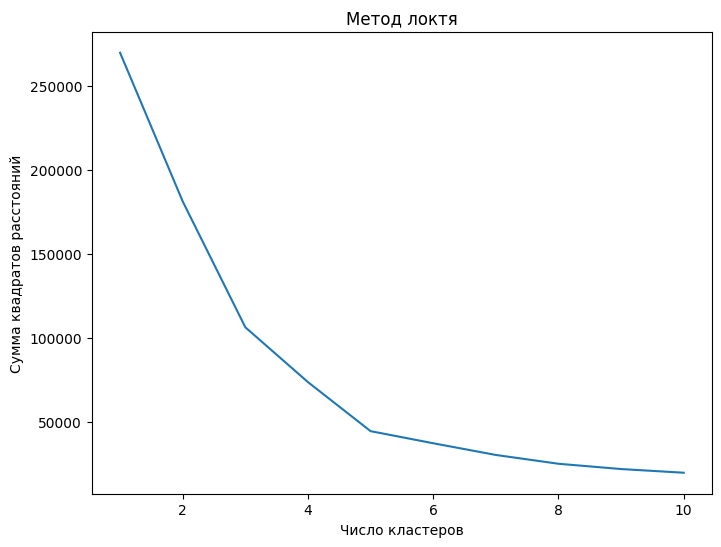

In [35]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    wcss.append(kmeans.inertia_)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss)
plt.title('Метод локтя')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

Методом локтя определим, какое оптимальное кол-во кластеров. Как я уже сказала раньше наилучшим кол-вом будет пять кластеров или 3 кластера.

5) Обучить модель К-средних и предсказать кластер для каждого значения из датасета.

In [37]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

labels = kmeans.predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Добавление предсказанных кластеров в датафрейм
data['Cluster'] = labels



6) Построить графическую интерпретацию из пункта 3, с центрами кластеров.

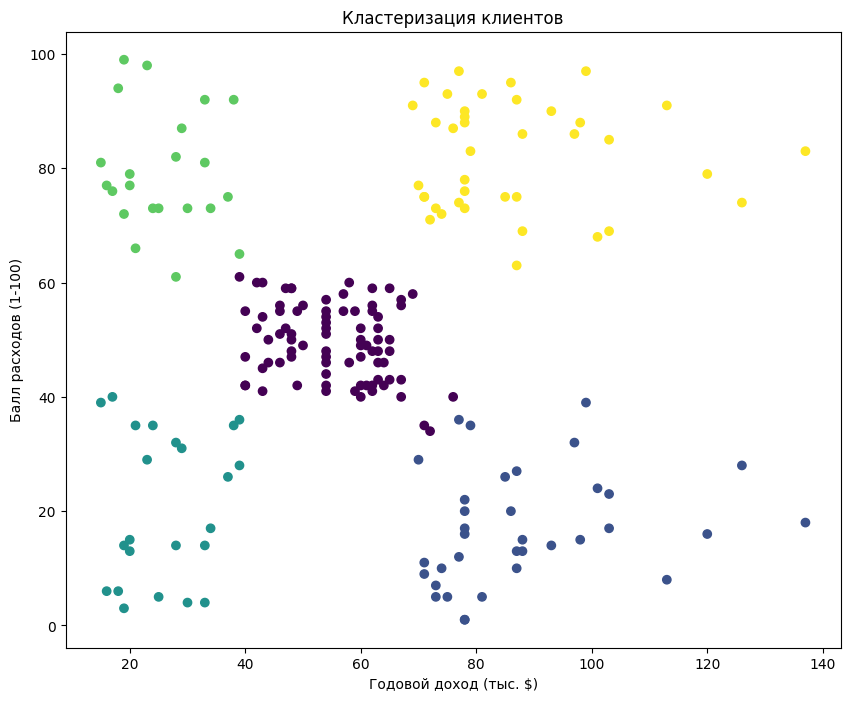

In [38]:
plt.figure(figsize=(10, 8))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Годовой доход (тыс. $)')
plt.ylabel('Балл расходов (1-100)')
plt.title('Кластеризация клиентов')
plt.show()

Вывод: данные хорошо и довольно точно разделились на пять кластеров

7) Построить графическую интерпретацию с центрами кластеров, в качестве x-координаты используйте Возраст, в качестве y-координаты Spending Score.

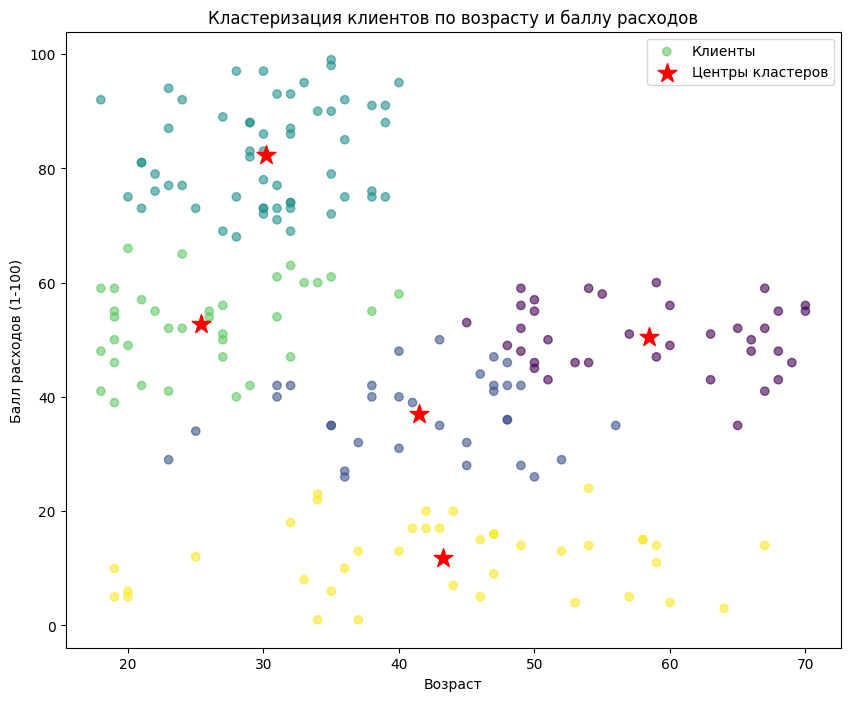

In [39]:

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data[['Age', 'Spending Score (1-100)']])

centers = kmeans.cluster_centers_

fig, ax = plt.subplots(figsize=(10, 8))


ax.scatter(data['Age'], data['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis', alpha=0.6, label='Клиенты')

ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='*', s=200, label='Центры кластеров')

ax.set_title('Кластеризация клиентов по возрасту и баллу расходов')
ax.set_xlabel('Возраст')
ax.set_ylabel('Балл расходов (1-100)')


ax.legend()
plt.show()

Вывод: визуально возраст и расходы деляться на кластеры хуже

8) Оцените модель с помощью метрик.


In [40]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Вычисление метрик
silhouette = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)
davies_bouldin = davies_bouldin_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)

print(f'Silhouette Score: {silhouette:.3f}')
print(f'Calinski-Harabasz Score: {calinski_harabasz:.3f}')
print(f'Davies-Bouldin Score: {davies_bouldin:.3f}')

Silhouette Score: 0.036
Calinski-Harabasz Score: 45.447
Davies-Bouldin Score: 5.005


Silhouette Score (Коэффициент силуэта) оценивает, насколько хорошо каждый объект соответствует своему кластеру по сравнению с другими кластерами. Значения находятся в диапазоне от -1 до 1, где более высокие значения указывают на лучшее соответствие.

Calinski-Harabasz Score (Индекс Калинского-Харабаша) оценивает отношение между внутрикластерной дисперсией и межкластерной дисперсией. Более высокие значения указывают на более плотные и отделенные кластеры.

Davies-Bouldin Score (Индекс Дэвиса-Булдена) оценивает среднее сходство между каждым кластером и его наиболее похожим кластером. Более низкие значения указывают на более отделенные кластеры.

Эти метрики помогают оценить качество кластеризации, выполненной моделью K-Means. Высокие значения Silhouette Score и Calinski-Harabasz Score, а также низкое значение Davies-Bouldin Score указывают на хорошее качество кластеризации.

9) Сравните эффективность модели кластеризации в зависимости от количества кластеров. Сделайте выводы.

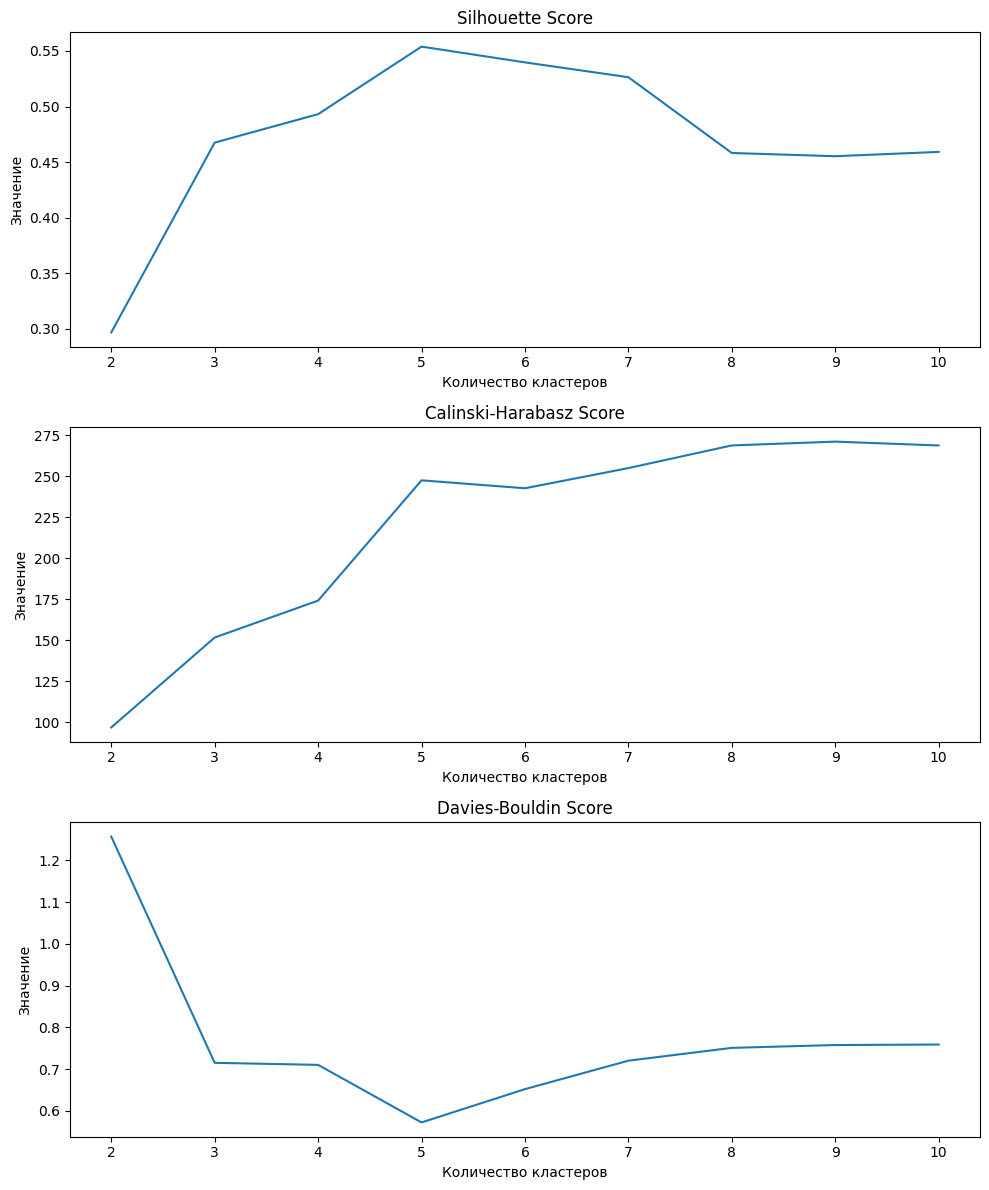

In [41]:
n_clusters_range = range(2, 11)

# Инициализация списков для хранения метрик
silhouette_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
customer = data
# Цикл по количеству кластеров
for n_clusters in n_clusters_range:
    # Обучение модели K-Means
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    kmeans.fit(customer[['Annual Income (k$)', 'Spending Score (1-100)']])

    # Вычисление метрик
    silhouette = silhouette_score(customer[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)
    calinski_harabasz = calinski_harabasz_score(customer[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)
    davies_bouldin = davies_bouldin_score(customer[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_)

    # Сохранение метрик
    silhouette_scores.append(silhouette)
    calinski_harabasz_scores.append(calinski_harabasz)
    davies_bouldin_scores.append(davies_bouldin)

# Построение графиков
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

ax1.plot(n_clusters_range, silhouette_scores)
ax1.set_title('Silhouette Score')
ax1.set_xlabel('Количество кластеров')
ax1.set_ylabel('Значение')

ax2.plot(n_clusters_range, calinski_harabasz_scores)
ax2.set_title('Calinski-Harabasz Score')
ax2.set_xlabel('Количество кластеров')
ax2.set_ylabel('Значение')

ax3.plot(n_clusters_range, davies_bouldin_scores)
ax3.set_title('Davies-Bouldin Score')
ax3.set_xlabel('Количество кластеров')
ax3.set_ylabel('Значение')

plt.tight_layout()
plt.show()

Анализируя полученные графики, можно сделать следующие выводы:

Silhouette Score: Значение Silhouette Score достигает максимума при 5 кластерах, что указывает на оптимальное разделение данных на 5 кластеров.

Calinski-Harabasz Score: Значение Calinski-Harabasz Score также достигает максимума при 5 кластерах, что подтверждает оптимальность выбора 5 кластеров.

Davies-Bouldin Score: Значение Davies-Bouldin Score достигает минимума при 5 кластерах, что также свидетельствует о том, что 5 кластеров является оптимальным выбором.

Таким образом, на основе анализа трех метрик можно сделать вывод, что оптимальное количество кластеров для данного набора данных составляет 5.